In [83]:
import os
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread,imshow
from skimage.transform import resize
from skimage.color import rgb2gray
from sklearn.model_selection import train_test_split

In [84]:
kendell=os.listdir("C:/image processing/ashok/")
priya=os.listdir("C:/image processing/priya/")
samantha=os.listdir("C:/image processing/samantha/")

In [85]:
limit=10
kendell_images = [None]*limit
priya_images = [None]*limit
samantha_images = [None]*limit
j=0
for i in kendell:
    if (j<limit):
        kendell_images[j]= imread("C:/image processing/ashok/"+i)
        j+=1
    else:
        break

j=0
for i in priya:
    if(j<limit):
        priya_images[j]=imread("C:/image processing/priya/"+i)
        j+=1
    else:
        break

j=0
for i in samantha:
    if(j<limit):
        samantha_images[j]=imread("C:/image processing/samantha/"+i)
        j+=1
    else:
        break

In [86]:
kendell_gray=[None]*limit
priya_gray=[None]*limit
samantha_gray=[None]*limit
j=0

for i in kendell:
    if(j<limit):
        kendell_gray[j]=rgb2gray(kendell_images[j])
        j+=1
    else:
        break
j=0
for i in priya:
    if(j<limit):
        priya_gray[j]=rgb2gray(priya_images[j])
        j+=1
    else:
        break
    

j=0
for i in samantha:
    if(j<limit):
        samantha_gray[j]=rgb2gray(samantha_images[j])
        j+=1
    else:
        break

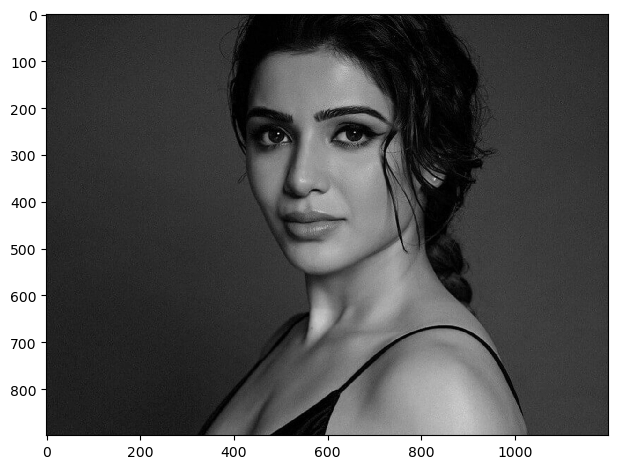

In [87]:
imshow(samantha_gray[0])

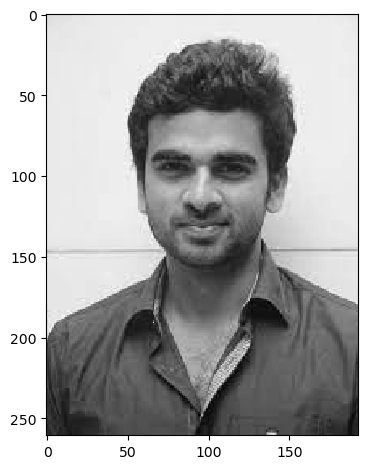

In [88]:
imshow(kendell_gray[0])

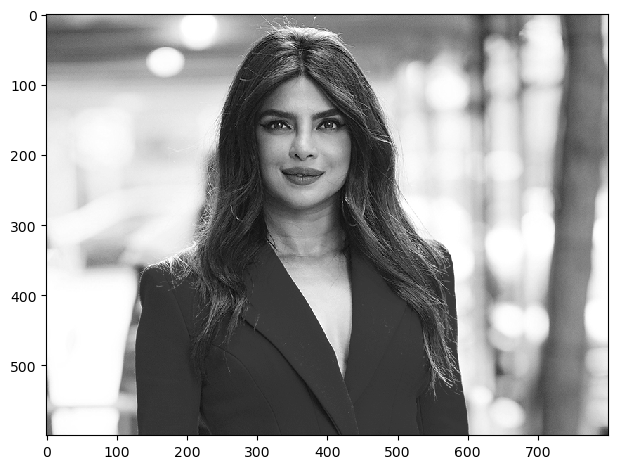

In [89]:
imshow(priya_gray[0])

In [90]:
samantha_gray[2].shape

(1350, 1080)

In [91]:
for j in range(10):
    samantha_temp=samantha_gray[j]
    samantha_gray[j]=resize(samantha_temp,(512,512))

In [92]:
for j in range(10):
    kendell_temp=kendell_gray[j]
    kendell_gray[j]=resize(kendell_temp,(512,512))
for j in range(10):
    priya_temp=priya_gray[j]
    priya_gray[j]=resize(priya_temp,(512,512))



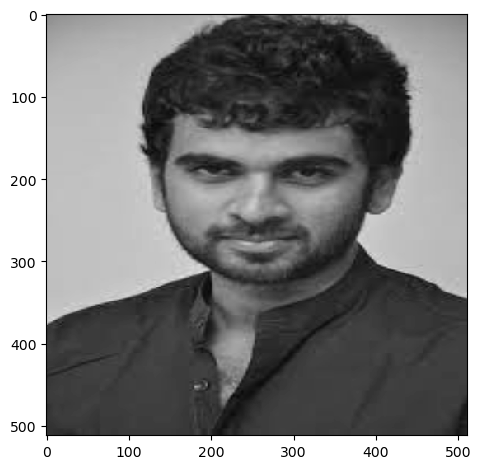

In [93]:
imshow(kendell_gray[2])

In [94]:
len_of_samantha=len(samantha_gray)
len_of_kendell=len(kendell_gray)
len_of_priya=len(priya_gray)


In [95]:
image_size_samantha=samantha_gray[1].shape
image_size_kendell=kendell_gray[1].shape
image_size_priya=priya_gray[1].shape

In [96]:
image_size_samantha

(512, 512)

In [97]:
flatten_size_samantha=image_size_samantha[0]*image_size_samantha[1]
flatten_size_kendell=image_size_kendell[0]*image_size_kendell[1]
flatten_size_priya=image_size_priya[0]*image_size_priya[1]

In [98]:
flatten_size_samantha

262144

In [99]:
for i in range(len_of_samantha):
    samantha_gray[i]= np.ndarray.flatten(samantha_gray[i].reshape(flatten_size_samantha,1))
for i in range(len_of_kendell):
    kendell_gray[i]= np.ndarray.flatten(kendell_gray[i].reshape(flatten_size_kendell,1))
for i in range(len_of_priya):
    priya_gray[i]= np.ndarray.flatten(priya_gray[i].reshape(flatten_size_priya,1))

In [100]:
samantha_gray=np.dstack(samantha_gray)
kendell_gray=np.dstack(kendell_gray)
priya_gray=np.dstack(priya_gray)

In [101]:
priya_gray.shape

(1, 262144, 10)

In [102]:
samantha_gray=np.rollaxis(samantha_gray,axis=2,start=0)
kendell_gray=np.rollaxis(kendell_gray,axis=2,start=0)
priya_gray=np.rollaxis(priya_gray,axis=2,start=0)
priya_gray.shape



(10, 1, 262144)

In [103]:
kendell_gray=np.rollaxis(kendell_gray,axis=2,start=1)
samantha_gray=np.rollaxis(samantha_gray,axis=2,start=1)
priya_gray=np.rollaxis(priya_gray,axis=2,start=1)

In [104]:
priya_gray.shape

(10, 262144, 1)

In [105]:
samantha_gray=samantha_gray.reshape(len_of_samantha,flatten_size_samantha)
kendell_gray=kendell_gray.reshape(len_of_kendell,flatten_size_kendell)
priya_gray=priya_gray.reshape(len_of_priya,flatten_size_priya)

In [106]:
kendell_gray.shape

(10, 262144)

In [109]:
samantha_data=pd.DataFrame(samantha_gray)
priya_data=pd.DataFrame(priya_gray)
kendell_data=pd.DataFrame(kendell_gray)


In [110]:
kendell_data

,0,1,2,3,4,5,6,7,8,9,...,262134,262135,262136,262137,262138,262139,262140,262141,262142,262143
0,0.860389,0.860389,0.860389,0.860389,0.860935,0.861984,0.863033,0.863486,0.863848,0.864450,...,0.110209,0.123306,0.135132,0.145200,0.143722,0.142244,0.145854,0.154992,0.164131,0.158165
1,0.682184,0.682112,0.682654,0.683422,0.684718,0.685798,0.685798,0.685860,0.687698,0.689536,...,0.532713,0.503546,0.474378,0.416129,0.356876,0.361090,0.377997,0.393254,0.407803,0.405863
2,0.548413,0.547620,0.548717,0.549814,0.551053,0.552493,0.553933,0.555610,0.557393,0.559176,...,0.109988,0.114308,0.118628,0.123392,0.129152,0.134912,0.140672,0.146431,0.152191,0.148025
3,0.833953,0.833953,0.833953,0.833953,0.833953,0.833953,0.833953,0.833953,0.833953,0.833953,...,0.501746,0.518864,0.536720,0.578522,0.623760,0.644278,0.657307,0.671564,0.686454,0.684861
4,0.195400,0.195411,0.195333,0.195499,0.196237,0.196807,0.196542,0.196312,0.197104,0.197896,...,0.368343,0.361263,0.354184,0.296685,0.237449,0.221335,0.213846,0.209577,0.206689,0.207074
5,0.928907,0.928907,0.928907,0.928907,0.928907,0.928907,0.929458,0.931051,0.932644,0.932828,...,0.310047,0.314459,0.316052,0.317645,0.306739,0.289214,0.270464,0.246567,0.222670,0.233699
6,0.813439,0.813439,0.813439,0.813439,0.813439,0.813439,0.813439,0.814780,0.816266,0.817361,...,0.193646,0.192257,0.190771,0.187840,0.171599,0.155357,0.146399,0.146031,0.145664,0.145899
7,0.362870,0.362650,0.363034,0.363418,0.363905,0.364448,0.365062,0.366645,0.368228,0.369782,...,0.103269,0.103641,0.102885,0.102129,0.103857,0.105765,0.108492,0.112681,0.116870,0.114470
8,0.694944,0.694944,0.694944,0.694944,0.694944,0.694944,0.694944,0.695652,0.697054,0.698456,...,0.774291,0.774291,0.774291,0.774291,0.774291,0.774291,0.775268,0.776669,0.778071,0.776953
9,0.105577,0.105577,0.105577,0.105577,0.105577,0.105577,0.105577,0.106285,0.107687,0.109089,...,0.059182,0.063387,0.067592,0.071797,0.076002,0.080207,0.083435,0.086238,0.089042,0.086805


In [111]:
samantha_data["label"]="Samantha"
kendell_data["label"]="kendell"
priya_data["label"]="priya"


In [112]:
priya_data

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.536652,0.567462,0.544082,0.559017,0.583616,0.602243,0.578947,0.586940,0.592106,0.591887,...,0.562604,0.487644,0.419400,0.376022,0.325338,0.265677,0.257426,0.226618,0.212304,priya
1,0.056991,0.056991,0.056991,0.056991,0.056991,0.056991,0.058447,0.060913,0.060913,0.060913,...,0.053070,0.053070,0.053070,0.053070,0.053070,0.053070,0.053070,0.053070,0.053070,priya
2,0.819332,0.816885,0.809103,0.814513,0.819853,0.816749,0.818630,0.816206,0.815531,0.813710,...,0.724942,0.755740,0.731958,0.728353,0.747810,0.754938,0.753899,0.779147,0.780075,priya
3,0.748876,0.748877,0.749935,0.747318,0.745604,0.750658,0.749125,0.749118,0.749118,0.749117,...,0.819050,0.809133,0.794861,0.800183,0.805825,0.804071,0.787833,0.791709,0.802581,priya
4,0.268721,0.272153,0.272153,0.269150,0.260817,0.255670,0.253525,0.260388,0.261368,0.262655,...,0.019188,0.014706,0.015135,0.016973,0.008211,0.004289,0.008333,0.008946,0.005270,priya
5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,priya
6,0.103941,0.065267,0.049374,0.048467,0.042988,0.046109,0.046191,0.046783,0.047338,0.052439,...,0.269702,0.212256,0.197379,0.202744,0.202706,0.202724,0.191692,0.173590,0.162868,priya
7,0.784857,0.780966,0.771628,0.757636,0.748369,0.743138,0.745403,0.742638,0.739632,0.741308,...,0.518839,0.512516,0.503644,0.490498,0.484184,0.479159,0.471411,0.469361,0.469274,priya
8,0.892661,0.892356,0.894976,0.897254,0.894647,0.896065,0.898074,0.900086,0.902174,0.902176,...,0.267230,0.379912,0.526808,0.642102,0.722041,0.777024,0.816876,0.837175,0.841581,priya
9,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,...,0.584017,0.584713,0.559944,0.550858,0.542053,0.525660,0.506621,0.513051,0.517931,priya


In [113]:
img_1=pd.concat([samantha_data,kendell_data])

In [114]:
img=pd.concat([img_1,priya_data])

In [115]:
img

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.152323,0.160850,0.130391,0.141080,0.152026,0.142906,0.159348,0.153101,0.149440,0.153399,...,0.231870,0.246691,0.244950,0.232854,0.247287,0.243752,0.238087,0.240136,0.249475,Samantha
1,0.796015,0.796015,0.796015,0.796015,0.796015,0.796015,0.796015,0.796015,0.796015,0.796015,...,0.798338,0.798261,0.788351,0.786573,0.786573,0.786573,0.786573,0.786573,0.786573,Samantha
2,0.431623,0.426975,0.421301,0.414263,0.408699,0.410175,0.409533,0.419853,0.444555,0.464146,...,0.853383,0.854250,0.860531,0.910402,0.860745,0.809368,0.773563,0.759676,0.747371,Samantha
3,0.934332,0.934332,0.934332,0.934332,0.934332,0.934332,0.934332,0.934332,0.934332,0.934332,...,0.592485,0.606068,0.602838,0.593539,0.584183,0.584267,0.574349,0.547524,0.561622,Samantha
4,0.228079,0.801200,0.767701,0.735336,0.729249,0.689423,0.625446,0.632988,0.623762,0.610182,...,0.999407,0.999167,0.999782,0.999875,0.999611,0.999611,0.999611,0.999611,0.997407,Samantha
5,0.642109,0.642109,0.642109,0.641562,0.642382,0.647059,0.646413,0.646031,0.646031,0.646031,...,0.732805,0.732142,0.728972,0.725398,0.724700,0.724553,0.724553,0.724523,0.726948,Samantha
6,0.460804,0.460804,0.460811,0.464039,0.467306,0.468647,0.468647,0.468647,0.468671,0.469340,...,0.675469,0.679131,0.682864,0.686910,0.690762,0.690762,0.690932,0.694614,0.693865,Samantha
7,0.889856,0.883889,0.892184,0.901596,0.898908,0.892244,0.887046,0.885812,0.878952,0.872351,...,0.691960,0.684897,0.716796,0.710129,0.725025,0.740675,0.732052,0.738899,0.730934,Samantha
8,0.776310,0.776310,0.776310,0.776310,0.776294,0.773365,0.772951,0.772952,0.772952,0.772898,...,0.472216,0.476403,0.477188,0.480411,0.484953,0.488422,0.488811,0.485994,0.489463,Samantha
9,0.129598,0.131146,0.130029,0.127597,0.132307,0.133726,0.126150,0.126099,0.131289,0.134787,...,0.171793,0.205684,0.204967,0.198399,0.200790,0.198606,0.195361,0.198102,0.197183,Samantha


In [116]:
from sklearn.utils import shuffle

In [117]:
img_shuffle = shuffle(img).reset_index()

In [118]:
img_shuffle

,index,0,1,2,3,4,5,6,7,8,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,1,0.056991,0.056991,0.056991,0.056991,0.056991,0.056991,0.058447,0.060913,0.060913,...,0.053070,0.053070,0.053070,0.053070,0.053070,0.053070,0.053070,0.053070,0.053070,priya
1,2,0.819332,0.816885,0.809103,0.814513,0.819853,0.816749,0.818630,0.816206,0.815531,...,0.724942,0.755740,0.731958,0.728353,0.747810,0.754938,0.753899,0.779147,0.780075,priya
2,2,0.431623,0.426975,0.421301,0.414263,0.408699,0.410175,0.409533,0.419853,0.444555,...,0.853383,0.854250,0.860531,0.910402,0.860745,0.809368,0.773563,0.759676,0.747371,Samantha
3,2,0.548413,0.547620,0.548717,0.549814,0.551053,0.552493,0.553933,0.555610,0.557393,...,0.114308,0.118628,0.123392,0.129152,0.134912,0.140672,0.146431,0.152191,0.148025,kendell
4,7,0.362870,0.362650,0.363034,0.363418,0.363905,0.364448,0.365062,0.366645,0.368228,...,0.103641,0.102885,0.102129,0.103857,0.105765,0.108492,0.112681,0.116870,0.114470,kendell
5,4,0.195400,0.195411,0.195333,0.195499,0.196237,0.196807,0.196542,0.196312,0.197104,...,0.361263,0.354184,0.296685,0.237449,0.221335,0.213846,0.209577,0.206689,0.207074,kendell
6,3,0.748876,0.748877,0.749935,0.747318,0.745604,0.750658,0.749125,0.749118,0.749118,...,0.819050,0.809133,0.794861,0.800183,0.805825,0.804071,0.787833,0.791709,0.802581,priya
7,4,0.268721,0.272153,0.272153,0.269150,0.260817,0.255670,0.253525,0.260388,0.261368,...,0.019188,0.014706,0.015135,0.016973,0.008211,0.004289,0.008333,0.008946,0.005270,priya
8,6,0.460804,0.460804,0.460811,0.464039,0.467306,0.468647,0.468647,0.468647,0.468671,...,0.675469,0.679131,0.682864,0.686910,0.690762,0.690762,0.690932,0.694614,0.693865,Samantha
9,5,0.928907,0.928907,0.928907,0.928907,0.928907,0.928907,0.929458,0.931051,0.932644,...,0.314459,0.316052,0.317645,0.306739,0.289214,0.270464,0.246567,0.222670,0.233699,kendell


In [119]:
img_shuffle=img_shuffle.drop(['index'],axis=1)

In [120]:
img_shuffle

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.056991,0.056991,0.056991,0.056991,0.056991,0.056991,0.058447,0.060913,0.060913,0.060913,...,0.053070,0.053070,0.053070,0.053070,0.053070,0.053070,0.053070,0.053070,0.053070,priya
1,0.819332,0.816885,0.809103,0.814513,0.819853,0.816749,0.818630,0.816206,0.815531,0.813710,...,0.724942,0.755740,0.731958,0.728353,0.747810,0.754938,0.753899,0.779147,0.780075,priya
2,0.431623,0.426975,0.421301,0.414263,0.408699,0.410175,0.409533,0.419853,0.444555,0.464146,...,0.853383,0.854250,0.860531,0.910402,0.860745,0.809368,0.773563,0.759676,0.747371,Samantha
3,0.548413,0.547620,0.548717,0.549814,0.551053,0.552493,0.553933,0.555610,0.557393,0.559176,...,0.114308,0.118628,0.123392,0.129152,0.134912,0.140672,0.146431,0.152191,0.148025,kendell
4,0.362870,0.362650,0.363034,0.363418,0.363905,0.364448,0.365062,0.366645,0.368228,0.369782,...,0.103641,0.102885,0.102129,0.103857,0.105765,0.108492,0.112681,0.116870,0.114470,kendell
5,0.195400,0.195411,0.195333,0.195499,0.196237,0.196807,0.196542,0.196312,0.197104,0.197896,...,0.361263,0.354184,0.296685,0.237449,0.221335,0.213846,0.209577,0.206689,0.207074,kendell
6,0.748876,0.748877,0.749935,0.747318,0.745604,0.750658,0.749125,0.749118,0.749118,0.749117,...,0.819050,0.809133,0.794861,0.800183,0.805825,0.804071,0.787833,0.791709,0.802581,priya
7,0.268721,0.272153,0.272153,0.269150,0.260817,0.255670,0.253525,0.260388,0.261368,0.262655,...,0.019188,0.014706,0.015135,0.016973,0.008211,0.004289,0.008333,0.008946,0.005270,priya
8,0.460804,0.460804,0.460811,0.464039,0.467306,0.468647,0.468647,0.468647,0.468671,0.469340,...,0.675469,0.679131,0.682864,0.686910,0.690762,0.690762,0.690932,0.694614,0.693865,Samantha
9,0.928907,0.928907,0.928907,0.928907,0.928907,0.928907,0.929458,0.931051,0.932644,0.932828,...,0.314459,0.316052,0.317645,0.306739,0.289214,0.270464,0.246567,0.222670,0.233699,kendell


In [121]:
img_shuffle.shape

(30, 262145)

In [122]:
x = img_shuffle.values[:,:-1]

In [123]:
y= img_shuffle.values[:,-1]

In [124]:
x

array([[0.056991372549019606, 0.056991372549019606, 0.056991372549019606,
        ..., 0.053069803921568626, 0.053069803921568626,
        0.053069803921568626],
       [0.8193318895962541, 0.8168852409476641, 0.8091026747189095, ...,
        0.7538990493103485, 0.7791465137097423, 0.7800751297355883],
       [0.43162320858752967, 0.42697503829308936, 0.4213008172552326,
        ..., 0.7735631118836062, 0.7596764750392573, 0.7473707344617367],
       ...,
       [0.9343321568627446, 0.9343321568627446, 0.9343321568627446, ...,
        0.5743494415150223, 0.5475235267445167, 0.561622237125872],
       [0.8898559750986375, 0.8838889719399883, 0.8921843472594381, ...,
        0.7320524101721267, 0.738898955927326, 0.7309342690883578],
       [0.1523231252078392, 0.1608497016815984, 0.13039082253650144, ...,
        0.23808666304175818, 0.24013632019210152, 0.24947482152050124]],
      dtype=object)

In [125]:
y

array(['priya', 'priya', 'Samantha', 'kendell', 'kendell', 'kendell',
       'priya', 'priya', 'Samantha', 'kendell', 'priya', 'kendell',
       'kendell', 'kendell', 'kendell', 'Samantha', 'priya', 'Samantha',
       'Samantha', 'kendell', 'priya', 'Samantha', 'priya', 'priya',
       'Samantha', 'kendell', 'priya', 'Samantha', 'Samantha', 'Samantha'],
      dtype=object)

In [126]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [127]:
from sklearn import svm

In [128]:
clf=svm.SVC()
clf.fit(x_train,y_train)

SVC()

In [129]:
y_pred=clf.predict(x_test)

In [130]:
y_pred

array(['priya', 'kendell', 'priya', 'priya', 'priya', 'priya', 'priya',
       'priya'], dtype=object)

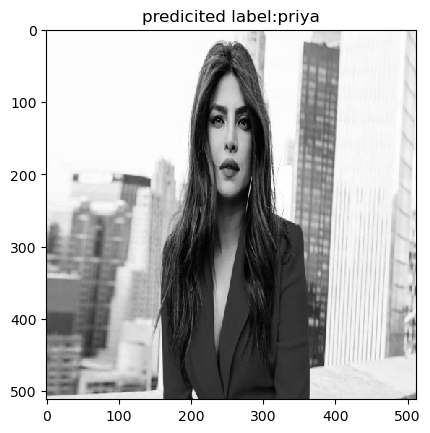

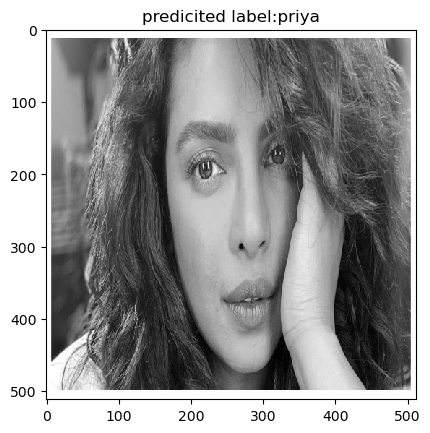

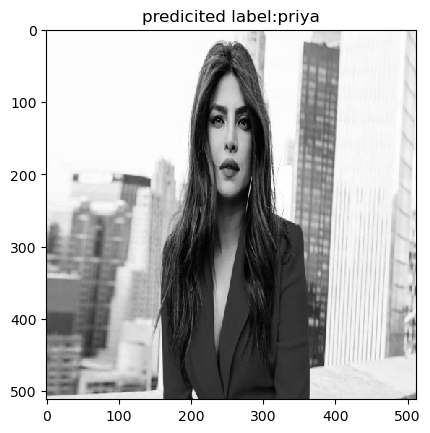

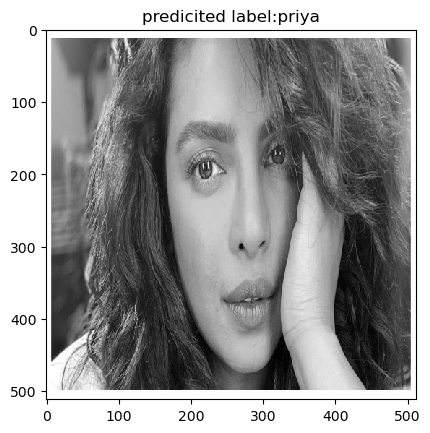

In [131]:
for i in (np.random.randint(0,6,4)):
    predicted_images = (np.reshape(x_test[i],(512,512)).astype(np.float64))
    plt.title('predicited label:{0}'.format(y_pred[i]))
    plt.imshow(predicted_images,interpolation='nearest',cmap='gray')
    plt.show()

In [132]:
from sklearn import metrics

In [133]:
accuracy=metrics.accuracy_score(y_test,y_pred)

In [134]:
accuracy

0.25

In [135]:
from sklearn.metrics import confusion_matrix

In [136]:
confusion_matrix(y_test,y_pred)

array([[0, 1, 3],
       [0, 0, 2],
       [0, 0, 2]], dtype=int64)